# Compare with Spada & Lanzafame (2019)

Didn't get very far because Spada & Lanzafame models don't seem to be available in bprp?

In [ ]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
class GP_model(object):

    def __init__(self):
        gp_model = pkg_resources.resource_filename(__name__, "gp_model_01.22.21.pkl")
        with open(gp_model, "rb") as f:
            model, map_soln = pickle.load(f)

        with model:
            self.func = xo.get_theano_function_for_var(model.y_test)
            self.args = xo.utils.get_args_for_theano_function(map_soln)
            self.ind1 = model.vars.index(model.x1_test)
            self.ind2 = model.vars.index(model.x2_test)

    def pred_at(self, log10age, teff):
        """
        teff in K, log age in ln(age [Gyr]).
        """
        lnage = np.log((10**(log10age))*1e-9)
        self.args[self.ind1][0] = teff
        self.args[self.ind2][0] = lnage
        return np.exp(self.func(*self.args))

In [3]:
import kinematics_and_rotation as kr

sl = pd.read_csv("../data/spada_lanzafame_models.csv")
sl.head()
# sl["teff"] = tb.bv

,Mass,(B−V),p0.10,p0.12,p0.15,p0.20,p0.22,p0.25,p0.30,p0.40,p0.50,p0.60,p0.70,p1.00,p1.50,p2.00,p2.50,p4.00,p4.57
0,0.45,1.477,9.69,9.76,10.96,14.87,15.95,17.09,18.24,19.99,21.54,22.92,24.18,27.20,29.87,31.13,31.89,33.36,34.40
1,0.50,1.440,9.08,9.28,11.83,14.43,14.99,15.63,16.50,17.80,18.76,19.53,20.19,21.68,23.20,24.66,26.12,30.53,32.41
2,0.55,1.390,8.40,9.92,11.54,12.43,12.76,13.24,14.00,15.30,16.18,16.69,17.04,17.92,19.47,21.27,23.26,29.81,32.71
3,0.60,1.338,8.26,9.65,10.38,11.25,11.50,11.84,12.28,12.94,13.43,13.88,14.30,15.61,17.86,20.20,22.62,30.29,33.25
4,0.65,1.277,8.18,8.60,9.25,9.97,10.16,10.39,10.71,11.22,11.68,12.15,12.62,14.12,16.77,19.62,22.62,31.50,34.71


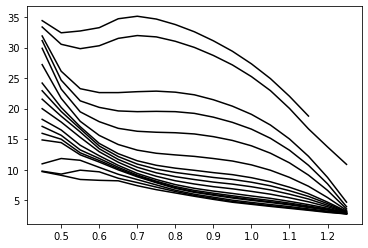

In [4]:
for c in sl.columns[2:]:
    plt.plot(sl["Mass"], sl["{}".format(c)], "k")

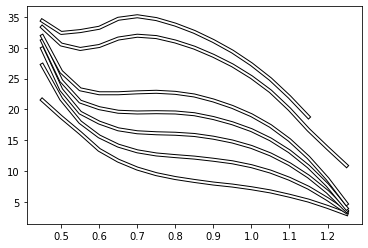

In [5]:
plt.plot(sl["Mass"], sl["p0.50"], "k", lw="4")
plt.plot(sl["Mass"], sl["p0.50"], "w", lw="2")
plt.plot(sl["Mass"], sl["p1.00"], "k", lw="4")
plt.plot(sl["Mass"], sl["p1.00"], "w", lw="2")
plt.plot(sl["Mass"], sl["p1.50"], "k", lw="4")
plt.plot(sl["Mass"], sl["p1.50"], "w", lw="2")
plt.plot(sl["Mass"], sl["p2.00"], "k", lw="4")
plt.plot(sl["Mass"], sl["p2.00"], "w", lw="2")
plt.plot(sl["Mass"], sl["p2.50"], "k", lw="4")
plt.plot(sl["Mass"], sl["p2.50"], "w", lw="2")
plt.plot(sl["Mass"], sl["p4.00"], "k", lw="4")
plt.plot(sl["Mass"], sl["p4.00"], "w", lw="2")
plt.plot(sl["Mass"], sl["p4.57"], "k", lw="4")
plt.plot(sl["Mass"], sl["p4.57"], "w", lw="2")